In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

**Q.. Use the user purchase record dataset to find user purchase patterns. The goal is to identify unusual purchases or users that deviate from the typical buying pattern.**

* **Visualize the distribution of purchase amount, items and other features.**

* **You can apply clustering techniques discussed, to segment customers based on their purchase history.**





In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/ecommerce_customer_data_large.csv')

In [ ]:
data_frame['Total Purchase Amount']= data_frame['Product Price'] * data_frame['Quantity']

In [ ]:
data_frame

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
data_frame.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [ ]:
data_frame['Returns'] = data_frame['Returns'].fillna(data_frame['Returns'].mode()[0])

#data['Native Country'] = data['Native Country'].fillna(data['Native Country'].mode()[0])

In [ ]:
#Handling the  null values by  applying mode on returns
data_frame.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

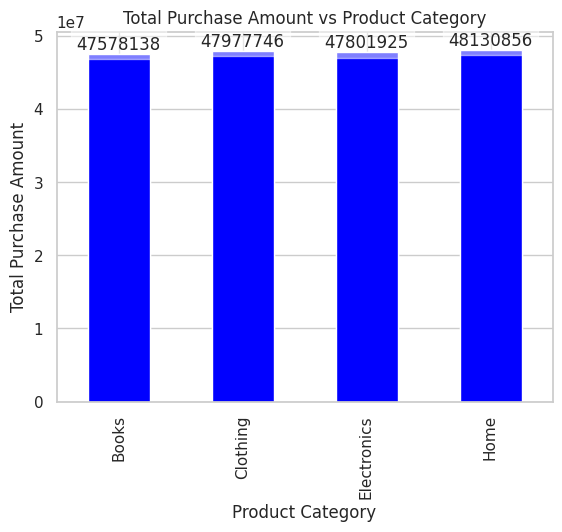

--------------------------------------------------------------------------------------------




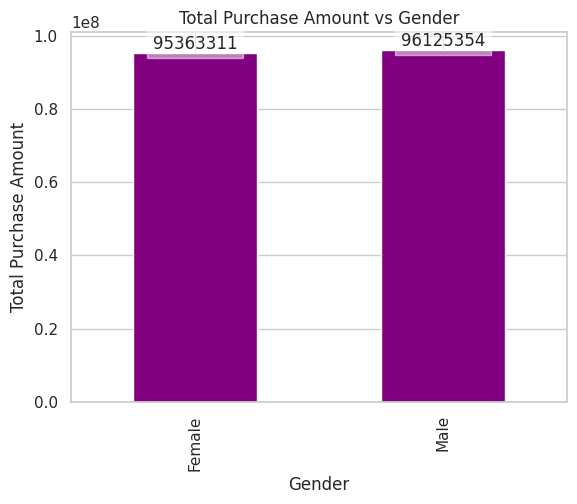

----------------------------------------------------------------------------------------------




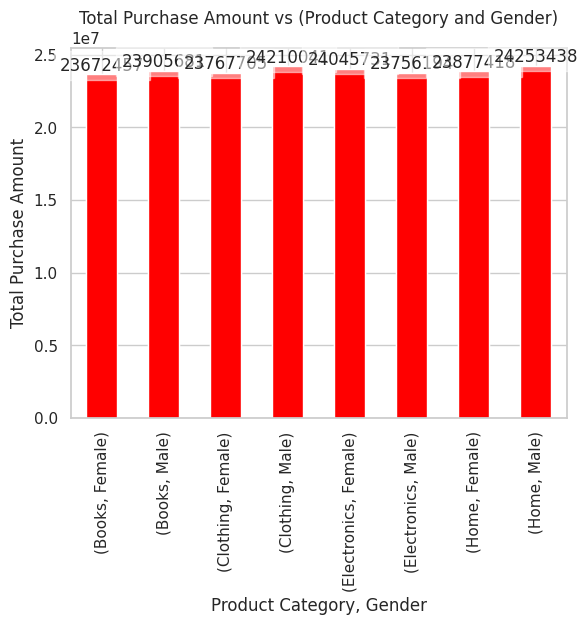

In [ ]:
# Visulize the Data (Product Category vs Total Purchase Amount)

groups = data_frame.groupby(["Product Category"])["Total Purchase Amount"].sum()
groups.plot.bar(color="red")
ax = groups.plot(kind='bar', color='blue', width=0.5)
for i, value in enumerate(groups):
    plt.text(i, value, str(value), ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount vs Product Category')
plt.show()
print("--------------------------------------------------------------------------------------------\n\n")
# Visulize the Data (Gender vs Total Purchase Amount)

groups = data_frame.groupby(["Gender"])["Total Purchase Amount"].sum()
groups.plot.bar(color="red")
ax = groups.plot(kind='bar', color='purple', width=0.5)
for i, value in enumerate(groups):
    plt.text(i, value, str(value), ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount vs Gender')
plt.show()
print("----------------------------------------------------------------------------------------------\n\n")

# Visulize the Data (Gender vs Total Purchase Amount)
groups = data_frame.groupby(["Product Category", "Gender"])["Total Purchase Amount"].sum()
groups.plot.bar(color="red")
ax = groups.plot(kind='bar', color='red', width=0.5)
for i, value in enumerate(groups):
    plt.text(i, value, str(value), ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Product Category, Gender')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount vs (Product Category and Gender)')
plt.show()


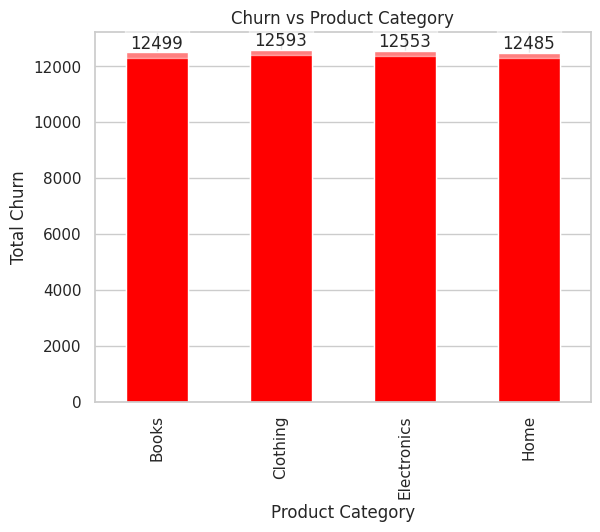

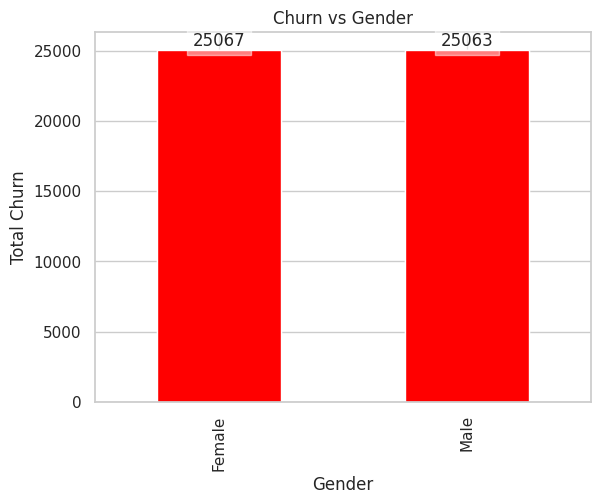

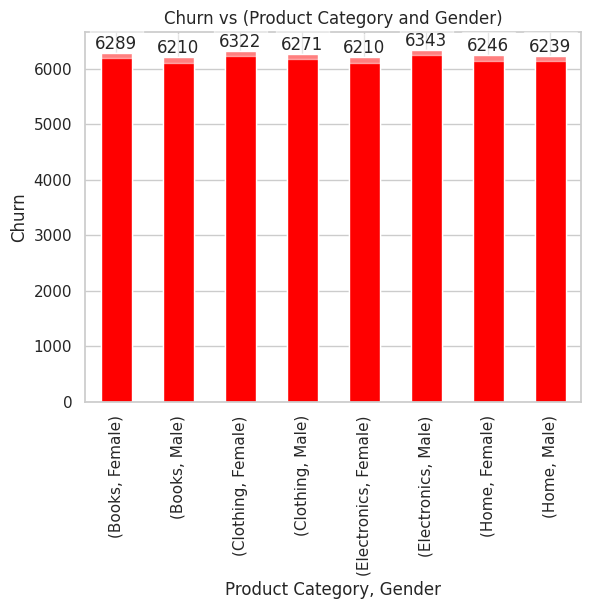

In [ ]:
# Visulize the Data (Gender vs Churn)
groups = data_frame.groupby(["Product Category"])["Churn"].sum()
groups.plot.bar(color="red")
ax = groups.plot(kind='bar', color='red', width=0.5)
for i, value in enumerate(groups):
    plt.text(i, value, str(value), ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Product Category')
plt.ylabel('Total Churn')
plt.title('Churn vs Product Category')
plt.show()

# Visulize the Data (Gender vs Churn)
groups = data_frame.groupby(["Gender"])["Churn"].sum()
groups.plot.bar(color="red")
ax = groups.plot(kind='bar', color='red', width=0.5)
for i, value in enumerate(groups):
    plt.text(i, value, str(value), ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Gender')
plt.ylabel('Total Churn')
plt.title('Churn vs Gender')
plt.show()

# Visulize the Data (Gender vs churn)
groups = data_frame.groupby(["Product Category", "Gender"])["Churn"].sum()
groups.plot.bar(color="red")
ax = groups.plot(kind='bar', color='red', width=0.5)
for i, value in enumerate(groups):
    plt.text(i, value, str(value), ha='center', va='bottom',bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Product Category, Gender')
plt.ylabel('Churn')
plt.title('Churn vs (Product Category and Gender)')
plt.show()


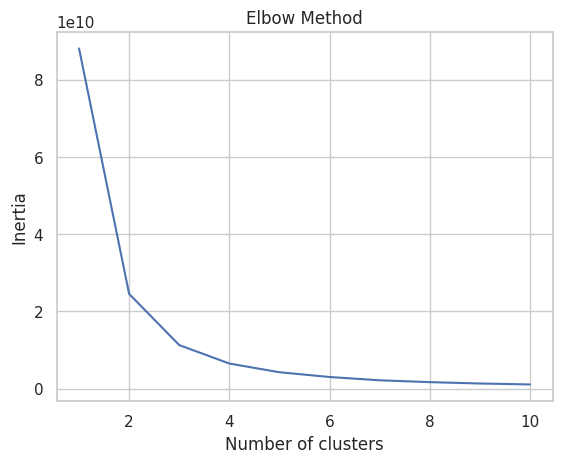

In [ ]:
# Elbow Method to find the optimal number of clusters
Inertia = []
N = data_frame[['Total Purchase Amount','Age','Returns','Churn']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(N)
    Inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), Inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') # Within cluster sum of squares
plt.show()

In [ ]:
avg_pur_custid = data_frame.groupby('Customer ID')['Total Purchase Amount'].mean().reset_index()
print(avg_pur_custid)

       Customer ID  Total Purchase Amount
0                1            1866.666667
1                2            1076.500000
2                3             903.250000
3                4             867.800000
4                5             452.600000
...            ...                    ...
49656        49996             872.428571
49657        49997             796.000000
49658        49998             844.000000
49659        49999             698.000000
49660        50000             553.000000

[49661 rows x 2 columns]


In [ ]:
# Applying K-means clustering with K=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(avg_pur_custid[['Total Purchase Amount']])

# Adding the cluster labels to the original DataFrame
avg_pur_custid['Cluster'] = kmeans.labels_

data_frame_cluster = data_frame.merge(avg_pur_custid[['Customer ID','Cluster']])
customer_info = data_frame[['Customer ID','Customer Name','Age','Gender','Churn','Product Category','Payment Method']].drop_duplicates()
customer_info = customer_info.merge(avg_pur_custid[['Customer ID','Total Purchase Amount','Cluster']])
print(customer_info)

        Customer ID      Customer Name  Age  Gender  Churn Product Category  \
0             44605        John Rivera   31  Female      0             Home   
1             44605        John Rivera   31  Female      0      Electronics   
2             44605        John Rivera   31  Female      0            Books   
3             44605        John Rivera   31  Female      0      Electronics   
4             44605        John Rivera   31  Female      0            Books   
...             ...                ...  ...     ...    ...              ...   
204484        33807   Gabriel Williams   63    Male      0             Home   
204485        20455       Barry Foster   66  Female      0      Electronics   
204486        28055       Lisa Johnson   63  Female      0      Electronics   
204487        15023  Melissa Fernandez   64    Male      0      Electronics   
204488         4148      Angela Norton   32    Male      0             Home   

       Payment Method  Total Purchase Amount  Clust

In [ ]:
print(data_frame_cluster)

        Customer ID        Purchase Date Product Category  Product Price  \
0             44605  2023-05-03 21:30:02             Home            177   
1             44605  2021-05-16 13:57:44      Electronics            174   
2             44605  2020-07-13 06:16:57            Books            413   
3             44605  2023-01-17 13:14:36      Electronics            396   
4             44605  2021-05-01 11:29:27            Books            259   
...             ...                  ...              ...            ...   
249995        33807  2023-01-24 12:32:18             Home            436   
249996        20455  2021-06-04 05:45:25      Electronics            233   
249997        28055  2022-11-10 17:11:57      Electronics            441   
249998        15023  2021-06-27 14:42:12      Electronics             44   
249999         4148  2020-09-07 05:12:19             Home            307   

        Quantity  Total Purchase Amount Payment Method  Customer Age  Returns  \
0     

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


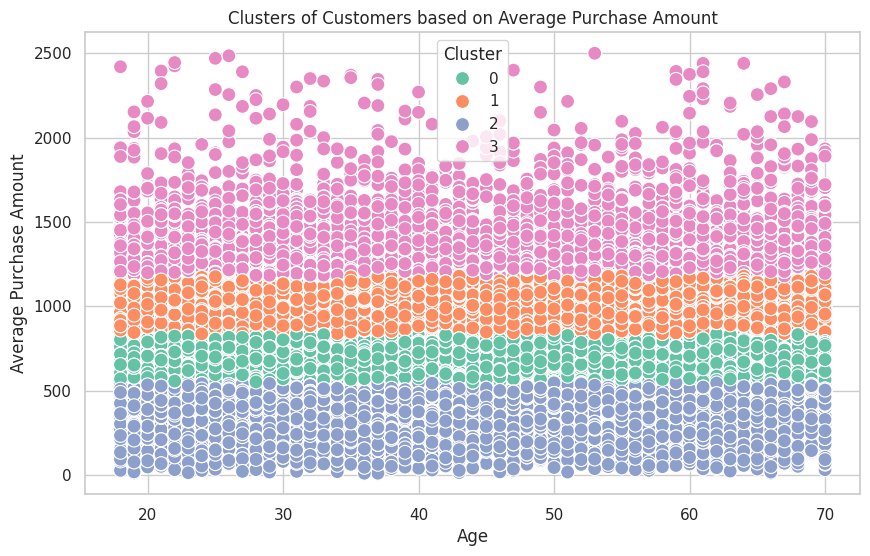

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_info, x='Age', y='Total Purchase Amount', hue='Cluster', palette='Set2', s=100)  # Changed palette to 'Set2'
plt.title('Clusters of Customers based on Average Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
selected_columns = ['Customer ID', 'Age', 'Gender','Total Purchase Amount']

# Iterate over unique clusters
for cluster_id in customer_info['Cluster'].unique():
    # Filter the DataFrame for the current cluster
    cluster_data = customer_info[customer_info['Cluster'] == cluster_id]

    # Select the desired columns for the current cluster
    segmented_customers = cluster_data[selected_columns]

    # Print the segment along with selected columns
    print(f"Segment {cluster_id}:")
    print(segmented_customers)
    print()

Segment 0:
        Customer ID  Age  Gender  Total Purchase Amount
0             44605   31  Female                  667.2
1             44605   31  Female                  667.2
2             44605   31  Female                  667.2
3             44605   31  Female                  667.2
4             44605   31  Female                  667.2
...             ...  ...     ...                    ...
204462        42239   61    Male                  724.0
204463        42239   61    Male                  724.0
204470        26558   48  Female                  688.0
204471        25677   50    Male                  704.0
204479          150   68    Male                  588.0

[85670 rows x 4 columns]

Segment 2:
        Customer ID  Age  Gender  Total Purchase Amount
16            42650   20  Female             346.692308
17            42650   20  Female             346.692308
18            42650   20  Female             346.692308
19            42650   20  Female             346.692308

In [ ]:
# Define the columns you want to select
selected_columns = ['Customer ID', 'Age', 'Gender', 'Total Purchase Amount', 'Product Category', 'Payment Method']

# Iterate over unique clusters
for cluster_id in customer_info['Cluster'].unique():
    # Filter the DataFrame for the current cluster
    cluster_data = customer_info[customer_info['Cluster'] == cluster_id]

    # Select the desired columns for the current cluster
    segmented_customers = cluster_data[selected_columns]

    # Count number of males and females
    gender_counts = segmented_customers['Gender'].value_counts()
    num_males = gender_counts.get('Male', 0)
    num_females = gender_counts.get('Female', 0)
    Total_num = num_males + num_females

    # Calculate total purchase amount for males and females
    total_purchase_amount_males = segmented_customers[segmented_customers['Gender'] == 'Male']['Total Purchase Amount'].sum()
    total_purchase_amount_females = segmented_customers[segmented_customers['Gender'] == 'Female']['Total Purchase Amount'].sum()

    # Calculate average purchase amount for males and females
    if num_males > 0:
        avg_purchase_amount_males = total_purchase_amount_males / num_males
    else:
        avg_purchase_amount_males = 0

    if num_females > 0:
        avg_purchase_amount_females = total_purchase_amount_females / num_females
    else:
        avg_purchase_amount_females = 0

    # Calculate the most frequently used payment method for males and females
    most_frequent_payment_method_males = segmented_customers[segmented_customers['Gender'] == 'Male']['Payment Method'].mode().values[0]
    most_frequent_payment_method_females = segmented_customers[segmented_customers['Gender'] == 'Female']['Payment Method'].mode().values[0]

    # Calculate the most frequently purchased product category for males and females
    most_frequent_category_males = segmented_customers[segmented_customers['Gender'] == 'Male']['Product Category'].mode().values[0]
    most_frequent_category_females = segmented_customers[segmented_customers['Gender'] == 'Female']['Product Category'].mode().values[0]


    # Print the segment along with selected columns and statistics
    print(f"CLuster Segment {cluster_id}:")
    print("Number of Males:", num_males)
    print("Number of Females:", num_females)
    print("Number of Males & Females:",Total_num)
    print("Average Purchase Amount for Males:", avg_purchase_amount_males)
    print("Average Purchase Amount for Females:", avg_purchase_amount_females)
    print("Most Frequently Used Payment Method for Males:", most_frequent_payment_method_males)
    print("Most Frequently Used Payment Method for Females:", most_frequent_payment_method_females)
    print("Most Frequently Purchased Product Category for Males:", most_frequent_category_males)
    print("Most Frequently Purchased Product Category for Females:", most_frequent_category_females)
    print()


CLuster Segment 0:
Number of Males: 42966
Number of Females: 42704
Number of Males & Females: 85670
Average Purchase Amount for Males: 695.9959199330943
Average Purchase Amount for Females: 696.3203922696979
Most Frequently Used Payment Method for Males: Cash
Most Frequently Used Payment Method for Females: Credit Card
Most Frequently Purchased Product Category for Males: Electronics
Most Frequently Purchased Product Category for Females: Electronics

CLuster Segment 2:
Number of Males: 21971
Number of Females: 21408
Number of Males & Females: 43379
Average Purchase Amount for Males: 421.6707101855912
Average Purchase Amount for Females: 424.41785449034955
Most Frequently Used Payment Method for Males: Cash
Most Frequently Used Payment Method for Females: Cash
Most Frequently Purchased Product Category for Males: Electronics
Most Frequently Purchased Product Category for Females: Electronics

CLuster Segment 1:
Number of Males: 31214
Number of Females: 30393
Number of Males & Females: 

Inferences:



*   Based on K means we have got 4 clusters

